# Text Mining  pipeline

### let's import a few free-open source tools to our convenience 

In [31]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.punkt import PunktSentenceTokenizer as PST
import string
import numpy as np
import contractions

# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

### Read data

In [2]:
import pandas as pd
data = pd.read_json("stupidstuff.json")
data[0:10]

,body,category,id,rating
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63
1,"At a dinner party, several of the guests were...",Blonde Jokes,2,2.57
2,One day this cop pulls over a blonde for spee...,Blonde Jokes,3,3.09
3,Three women are about to be executed for crim...,Blonde Jokes,4,4.10
4,A girl came skipping home FROM school one day...,Blonde Jokes,5,4.30
5,An airline captain was helping a new blonde f...,Military,6,3.23
6,A blonde and a brunette decided to rob a bank...,Blonde Jokes,7,4.00
7,"A brunette, a redhead and a blonde walk into ...",Blonde Jokes,8,2.33
8,A blonde suspects her boyfriend of cheating o...,Blonde Jokes,9,3.77
9,One day a blonde comes out of the tanning sal...,Blonde Jokes,10,3.64


In [65]:
data['body'] = data['body'].str.strip()
data['body'] = data['body'].apply(contractions.fix)

### Feature eng.

- number of words
- number of characters
- number of sentences
- number of punctuations
- number of all CAPS-LOCK words
- ratio of all CAPS-LOCK words to total words
- number of stopwords
- mean length of words
- number of syntax errors
- number of new-lines? /isn't sentence
- specific punctuations: ?, !
- repetition of words? / BoW-TfIdf

In [36]:
def remove_digits(text):
    return ''.join([i for i in text if not i.isdigit()])

data['body'] = data['body'].apply(remove_digits)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,102,539,8,33,0,47,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,80,449,8,33,0,29,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,185,998,19,102,3,64,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [37]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [38]:
data['body_no_punct'] = data['body'].apply(remove_punctuation)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,102,539,8,33,0,47,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,80,449,8,33,0,29,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,185,998,19,102,3,64,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [39]:
def words_counter(text):
    words = nltk.word_tokenize(text)
    return len(words)
data['words_count'] = data['body_no_punct'].apply(words_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,539,8,33,0,47,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,449,8,33,0,29,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,998,19,102,3,64,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [40]:
def characters_counter(text):
    return len(text)
data['characters_count'] = data['body'].apply(characters_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,33,0,47,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,33,0,29,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,102,3,64,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [41]:
def sentences_counter(text, pst): 
    sentences = [sentence for sentence in pst.sentences_from_text(text, False) if not sentence in string.punctuation]
    return len(sentences)

pst = PST()
data['sentences_count'] = data['body'].apply(sentences_counter, args = (pst,))
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,33,0,47,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,33,0,29,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,102,3,64,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [42]:
def punct_counter(text):
    puncts = [c for c in text if c in string.punctuation]
    return len(puncts)

data['punct_count'] = data['body'].apply(punct_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,47,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,29,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,64,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [43]:
def all_caps_counter(text):
    all_caps_words = [word for word in nltk.word_tokenize(text) if (word.isupper() and len(remove_punctuation(word)) > 1 and not bool(re.search('(24:00|2[0-3]:[0-5][0-9]|[0-1][0-9]:[0-5][0-9])', word)))]
    return len(all_caps_words)
data['all_caps_count'] = data['body_no_punct'].apply(all_caps_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,47,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,29,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,64,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [44]:
def stopwords_counter(text):
    stops = [word for word in nltk.word_tokenize(text) if word in stopwords]
    return len(stops)
data['stopwords_count'] = data['body'].apply(stopwords_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,50,3.872549,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,31,4.175000,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,73,3.789189,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [45]:
def mean_length(text):
    text = nltk.word_tokenize(text)
    return (sum( map(len, text) ) / len(text))

data['mean_len_word'] = data['body_no_punct'].apply(lambda x: mean_length(x))
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,50,3.800000,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,31,4.109756,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,73,3.786885,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [46]:
#def dot_counter(text): 
#    return text.count(".")
#data['dot_count'] = data['body'].apply(dot_counter)

In [47]:
def comma_counter(text): 
    return text.count(",")
data['comma_count'] = data['body'].apply(comma_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,50,3.800000,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,31,4.109756,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,73,3.786885,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [48]:
def qmark_counter(text): 
    return text.count("?")
data['qmark_count'] = data['body'].apply(qmark_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,50,3.800000,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,31,4.109756,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,73,3.786885,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [49]:
def excmark_counter(text): 
    return text.count("!")
data['excmark_count'] = data['body'].apply(excmark_counter)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,50,3.800000,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,31,4.109756,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,73,3.786885,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [50]:
def stopwords_cleaner(text):
    words = nltk.word_tokenize(text)
    text = [word.lower() for word in words if word not in stopwords]
    return text

data['text_prepared'] = data['body_no_punct'].apply(stopwords_cleaner)
data.head()

,body,category,id,rating,body_no_punct,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,excmark_count,text_prepared
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,A blackjack dealer and a player with a thirtee...,105,543,8,30,0,50,3.800000,11,2,0,"[a, blackjack, dealer, player, thirteen, count..."
1,"At a dinner party, several of the guests were ...",Blonde Jokes,2,2.57,At a dinner party several of the guests were a...,82,452,8,31,0,31,4.109756,7,0,1,"[at, dinner, party, several, guests, arguing, ..."
2,One day this cop pulls over a blonde for speed...,Blonde Jokes,3,3.09,One day this cop pulls over a blonde for speed...,47,225,5,8,0,21,3.638298,0,0,0,"[one, day, cop, pulls, blonde, speeding, the, ..."
3,Three women are about to be executed for crime...,Blonde Jokes,4,4.10,Three women are about to be executed for crime...,144,898,19,64,0,56,4.673611,16,0,6,"[three, women, executed, crimes, ones, brunett..."
4,A girl came skipping home FROM school one day....,Blonde Jokes,5,4.30,A girl came skipping home FROM school one day ...,183,990,19,93,3,73,3.786885,43,5,3,"[a, girl, came, skipping, home, from, school, ..."


In [51]:
data_alt = data[(data['rating'] != 0.00) & (data['rating'] != 0.50) & (data['rating'] != 1.00) & (data['rating'] != 1.50) & (data['rating'] != 2.00) & (data['rating'] != 2.50) & (data['rating'] != 3.00) & (data['rating'] != 3.50) & (data['rating'] != 4.00) & (data['rating'] != 4.50) & (data['rating'] != 5.00)]

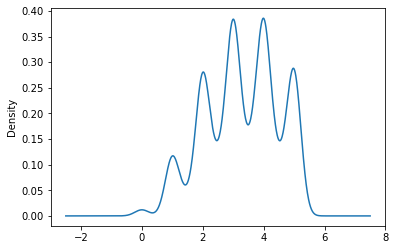

In [52]:
data['rating'].plot.kde()

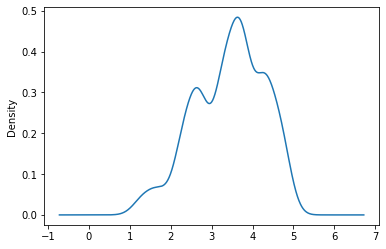

In [53]:
data_alt['rating'].plot.kde()

In [54]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3773.0,1887.000000,1089.315611,1.000000,944.000000,1887.00000,2830.000000,3773.0
rating,3773.0,3.284363,1.199279,0.000000,2.330000,3.09000,4.000000,5.0
words_count,3773.0,158.462497,161.365211,5.000000,60.000000,126.00000,205.000000,2576.0
characters_count,3773.0,876.163000,928.149711,26.000000,327.000000,682.00000,1121.000000,14764.0
sentences_count,3773.0,12.522661,13.917566,1.000000,4.000000,9.00000,16.000000,282.0
punct_count,3773.0,38.116353,50.942355,0.000000,14.000000,29.00000,49.000000,1608.0
all_caps_count,3773.0,1.582825,7.678891,0.000000,0.000000,0.00000,1.000000,253.0
stopwords_count,3773.0,67.219189,69.107536,0.000000,24.000000,52.00000,88.000000,1173.0
mean_len_word,3773.0,4.111474,0.427757,2.666667,3.844444,4.07767,4.330526,6.8
comma_count,3773.0,9.060164,9.860094,0.000000,2.000000,7.00000,13.000000,148.0


In [55]:
data_alt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,596.0,802.354027,736.519259,1.00,232.500000,656.500000,1033.500000,3762.000000
rating,596.0,3.431040,0.845172,1.14,2.740000,3.600000,4.170000,4.860000
words_count,596.0,151.798658,110.932017,8.00,82.000000,130.000000,202.000000,1365.000000
characters_count,596.0,818.711409,623.240623,39.00,440.000000,704.500000,1079.500000,8408.000000
sentences_count,596.0,12.505034,10.097590,1.00,6.000000,11.000000,16.000000,96.000000
punct_count,596.0,41.013423,45.426011,0.00,20.000000,33.000000,50.000000,702.000000
all_caps_count,596.0,1.117450,5.308908,0.00,0.000000,0.000000,0.000000,104.000000
stopwords_count,596.0,65.716443,48.523079,0.00,34.750000,54.000000,87.250000,559.000000
mean_len_word,596.0,4.044214,0.336697,3.00,3.840451,4.015068,4.203344,6.061947
comma_count,596.0,10.505034,8.474280,0.00,4.000000,9.000000,14.250000,55.000000


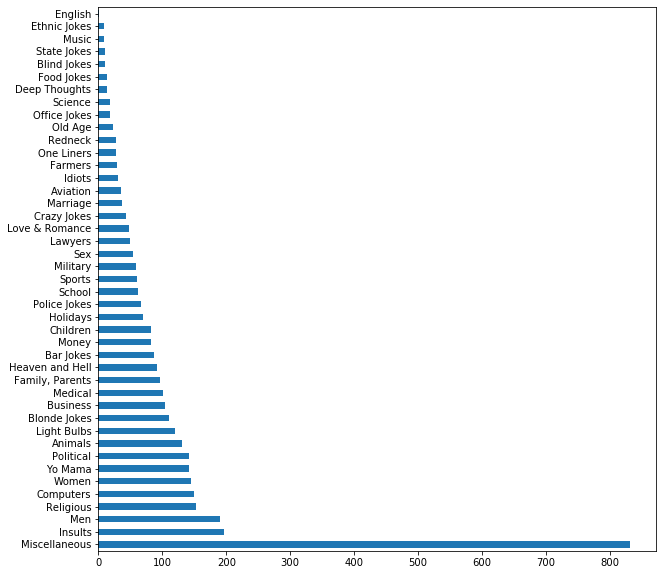

In [56]:
data['category'].value_counts().plot.barh(figsize = (10, 10))

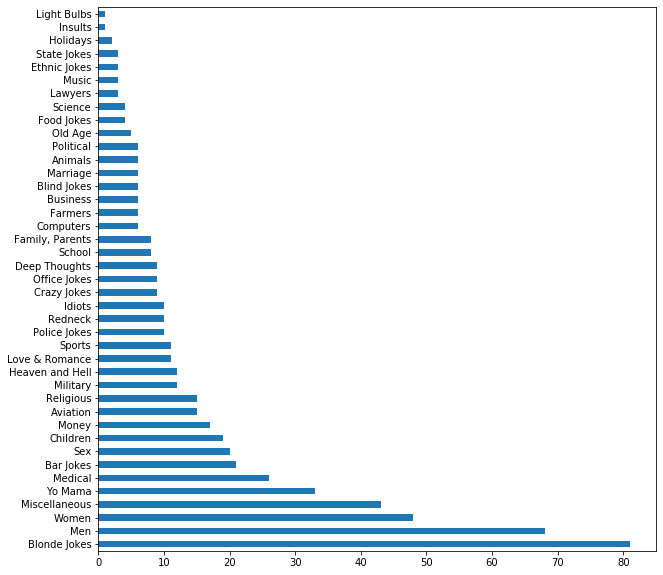

In [57]:
data_alt['category'].value_counts().plot.barh(figsize = (10, 10))

In [67]:
def stem_text(text):
    text = [ps.stem(word) for word in text]
    return text

vect = CountVectorizer(analyzer=stem_text, min_df=0., max_df=1.0)
dtm = vect.fit_transform(data['text_prepared'])
feat_names = np.array(vect.get_feature_names()) 
# print(pd.DataFrame(dtm.A, columns = vect.get_feature_names()).to_string())
df = pd.DataFrame(dtm.toarray().transpose(), index = vect.get_feature_names())

In [59]:
print(feat_names)

['a' 'aa' 'aaa' ... '�������' '�������ladi' '�������plate']


In [71]:
freqs=dtm.sum(axis=0).A.flatten()
index=np.argsort(freqs)[-10:] 
print(list(zip(feat_names[index], freqs[index])))

[('you', 1945), ('get', 2116), ('ask', 2196), ('man', 2297), ('a', 2565), ('said', 2621), ('one', 2685), ('say', 2712), ('the', 6090), ('i', 9457)]


In [30]:
X_Data = data.copy()

In [31]:
X_Data = pd.get_dummies(X_Data, columns=['category'])

In [18]:
#list(X_Data.columns.values)

In [32]:
del X_Data['body']
del X_Data['body_no_punct']
del X_Data['id']
del X_Data['text_prepared']

In [33]:
X_features_ = pd.concat([X_Data, pd.DataFrame(X_Bow.toarray())], axis=1)
X_features_.head()

,rating,words_count,characters_count,sentences_count,punct_count,all_caps_count,stopwords_count,mean_len_word,comma_count,qmark_count,...,19861,19862,19863,19864,19865,19866,19867,19868,19869,19870
0,2.63,102,539,8,33,0,47,3.872549,11,2,...,0,0,0,0,0,0,0,0,0,0
1,2.57,80,449,8,33,0,29,4.175000,7,0,...,0,0,0,0,0,0,0,0,0,0
2,3.09,47,225,5,8,0,21,3.638298,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.10,144,898,19,64,0,56,4.673611,16,0,...,0,0,0,0,0,0,0,0,0,0
4,4.30,185,998,19,102,3,64,3.789189,43,5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i, j in X_features_.iterrows():
    t = 0
    try:
        t = X_features_[j][i]
    except:
        print(i, j)
    if (type(t) is not 'numpy.float64' and type(t) is not 'numpy.int64'):
        print(i, j)
        print(type(t))
        print(t)
        break

### ML TIME!

In [26]:
from sklearn.linear_model import Lasso
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_features_, data['rating'], test_size=0.3)

In [28]:
param_grid = { 
    'alpha': [0.05, 0.1, 0.2],
    'fit_intercept': [True, False],
    'normalize' : [True, False],
    'max_iter' :[500, 1000],
    #'class_weight': [{1: 10, 0:1}, {1: 9, 0:1}]
}

In [29]:
model=Lasso()
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, scoring= 'neg_mean_absolute_error', n_jobs=-1)
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'alpha': 0.05, 'fit_intercept': False, 'max_iter': 500, 'normalize': True}

In [33]:
model1=Lasso(alpha=CV_model.best_params_['alpha'],
                fit_intercept= CV_model.best_params_['fit_intercept'],
                normalize=CV_model.best_params_['normalize'],
                max_iter=CV_model.best_params_['max_iter'])

In [36]:
model1.fit(X_train, y_train)
pred=model1.predict(X_test)

In [37]:
mean_absolute_error(y_test,pred)

0.0162604961161306

## Eval train set as well

In [41]:
X_Subset_ = X_train[0::17]
Y_Subset_ = y_train[0::17]

pred_sub=model1.predict(X_Subset_)
mean_absolute_error(Y_Subset_,pred_sub)

0.01632060395828205

### Feature Evaluation TBD

In [ ]:
bins = np.linspace(0,50,40) #y amount of samples, x len of each
pp.hist(data['body_len'], bins)
pp.show()

In [ ]:
for i in [1,2,3]:
    bins = np.linspace(0,50/(i**i),40)
    pp.hist((data[data['label'] == 'Valid']['body_len'])**(1/i), bins, label = 'VALID', alpha = 0.5)
    pp.hist((data[data['label'] == 'Spam']['body_len'])**(1/i), bins, label = 'SPAM', alpha = 0.5)
    pp.legend(loc='upper left')
    pp.title('transformation 1/{}'.format(str(i)))
    pp.show()